# Stroke prediction:
Data contains 5110 observations with 12 attributes.:
1) id: unique identifier <br/>
2) gender: "Male", "Female" or "Other" <br/>
3) age: age of the patient<br/>
4) hypertension: 0 if the patient doesn't have hypertension, 1 if the patient has hypertension<br/>
5) heart_disease: 0 if the patient doesn't have any heart diseases, 1 if the patient has a heart disease<br/>
6) ever_married: "No" or "Yes"<br/>
7) work_type: "children", "Govt_jov", "Never_worked", "Private" or "Self-employed"<br/>
8) Residence_type: "Rural" or "Urban"<br/>
9) avg_glucose_level: average glucose level in blood<br/>
10) bmi: body mass index<br/>
11) smoking_status: "formerly smoked", "never smoked", "smokes" or "Unknown"*<br/>
12) stroke: 1 if the patient had a stroke or 0 if not<br/>
link: https://www.kaggle.com/fedesoriano/stroke-prediction-dataset

In [1]:
import pandas as pd

In [2]:
import matplotlib as mpl
mpl.rcParams['font.size']=14

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
df=pd.read_csv('healthcare-dataset-stroke-data.xls')

In [5]:
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


Data summary

In [6]:
print('Rows: ',df.shape[0],'\nColumns: ',df.shape[1],'\nFeatures: ',df.columns.tolist())

Rows:  5110 
Columns:  12 
Features:  ['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married', 'work_type', 'Residence_type', 'avg_glucose_level', 'bmi', 'smoking_status', 'stroke']


In [7]:
print('Missing Values: \nFeatures\t\tCount')
df.isna().sum()

Missing Values: 
Features		Count


id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [8]:
df.nunique()

id                   5110
gender                  3
age                   104
hypertension            2
heart_disease           2
ever_married            2
work_type               5
Residence_type          2
avg_glucose_level    3979
bmi                   418
smoking_status          4
stroke                  2
dtype: int64

# We will drop id as it will of no use due to all unique values

In [9]:
df.drop(labels=['id'],axis=1,inplace=True)

# Stroke distribution

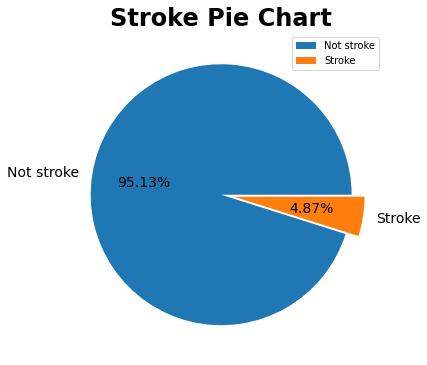

In [10]:
sizes = df['stroke'].value_counts(sort = True)
plt.figure(figsize=(6,6))
plt.pie(sizes, labels=['Not stroke','Stroke'], autopct='%1.2f%%', explode=[0, 0.1],textprops={'fontsize': 14})
plt.title("Stroke Pie Chart", fontdict={'fontsize': 24,'weight':'bold'})
plt.legend()
plt.show()

# Gender 

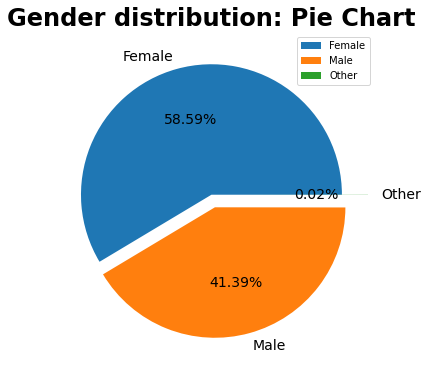

In [11]:
sizes = df['gender'].value_counts(sort = True)
plt.figure(figsize=(6,6))
plt.pie(sizes, labels=['Female','Male','Other'],explode=[0, 0.1,0.2], autopct='%1.2f%%',textprops={'fontsize': 14})
plt.title("Gender distribution: Pie Chart", fontdict={'fontsize': 24,'weight':'bold'})
plt.legend()
plt.show()

In [12]:
df['gender'].value_counts(sort = True)

Female    2994
Male      2115
Other        1
Name: gender, dtype: int64

In [13]:
print('Percentage of Stroke')
df[df['stroke']==1].gender.value_counts(sort=True)/df['gender'].value_counts(sort=True)*100

Percentage of Stroke


Female    4.709419
Male      5.106383
Other          NaN
Name: gender, dtype: float64

 From the above distribution we can see more no of females in data

<AxesSubplot:xlabel='gender', ylabel='count'>

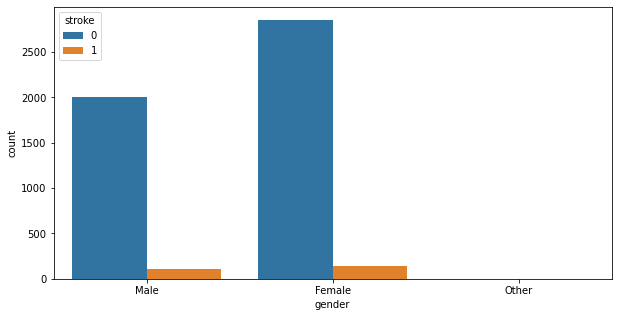

In [14]:
plt.figure(figsize=(10,5))
sns.countplot(data=df,x='gender',hue='stroke')

<AxesSubplot:xlabel='gender', ylabel='count'>

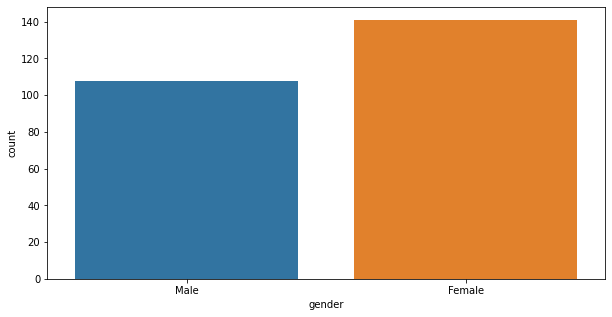

In [15]:
plt.figure(figsize=(10,5))
sns.countplot(data=df.loc[df['stroke']==1],x='gender')

<b> Note: Females had more stroke than male</b>

# Hypertension

In [16]:
df['hypertension'].value_counts()

0    4612
1     498
Name: hypertension, dtype: int64

In [17]:
print('Percentage of Stroke')
df[df['stroke']==1].hypertension.value_counts(sort=True)/df['hypertension'].value_counts(sort=True)*100

Percentage of Stroke


0     3.967910
1    13.253012
Name: hypertension, dtype: float64

Text(0.5, 1.0, 'Hypertension distribution according to Stroke')

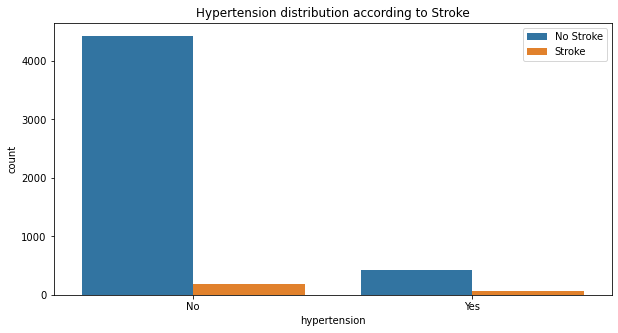

In [18]:
plt.figure(figsize=(10,5))
sns.countplot(data=df,x='hypertension',hue='stroke')
plt.xticks([0,1],['No','Yes'])
plt.legend(['No Stroke','Stroke'])
plt.title('Hypertension distribution according to Stroke')

<b> Note: From above distribution we can say people having hypertension are more prone to stroke

<AxesSubplot:xlabel='hypertension', ylabel='count'>

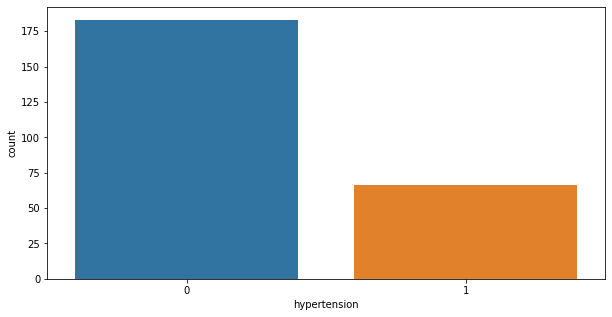

In [19]:
plt.figure(figsize=(10,5))
sns.countplot(data=df.loc[df['stroke']==1],x='hypertension')

<b>Note: People having hypertension had less stroke than people who didnt have hypertension</b>

# Heart_disease

In [20]:
df['heart_disease'].value_counts()

0    4834
1     276
Name: heart_disease, dtype: int64

In [21]:
print('Percentage of Stroke')
df[df['stroke']==1].heart_disease.value_counts(sort=True)/df['heart_disease'].value_counts(sort=True)*100

Percentage of Stroke


0     4.178734
1    17.028986
Name: heart_disease, dtype: float64

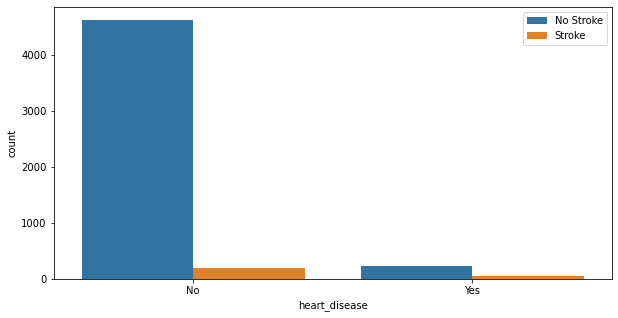

In [22]:
plt.figure(figsize=(10,5))
sns.countplot(data=df,x='heart_disease',hue='stroke')
plt.xticks([0,1],['No','Yes'])
plt.legend(['No Stroke','Stroke'])

<b> Note: People having heart disease are more prone to stroke

<AxesSubplot:xlabel='heart_disease', ylabel='count'>

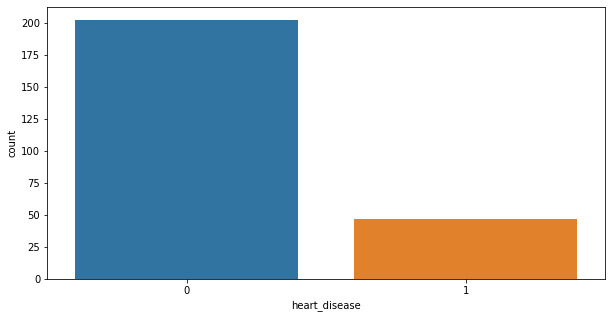

In [23]:
plt.figure(figsize=(10,5))
sns.countplot(data=df.loc[df['stroke']==1],x='heart_disease')

<b>Note: People having heart disease tends to have less stroke

# Married

In [24]:
df['ever_married'].value_counts()

Yes    3353
No     1757
Name: ever_married, dtype: int64

In [25]:
print('Percentage of Stroke')
df[df['stroke']==1].ever_married.value_counts(sort=True)/df['ever_married'].value_counts(sort=True)*100

Percentage of Stroke


Yes    6.561288
No     1.650541
Name: ever_married, dtype: float64

Text(0.5, 1.0, 'Hypertension distribution according to Stroke')

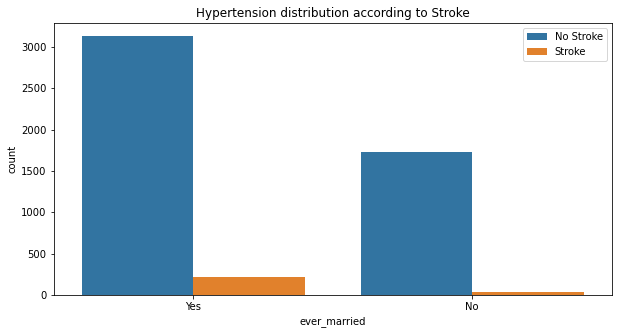

In [26]:
plt.figure(figsize=(10,5))
sns.countplot(data=df,x='ever_married',hue='stroke')
plt.legend(['No Stroke','Stroke'])
plt.title('Hypertension distribution according to Stroke')

<AxesSubplot:xlabel='ever_married', ylabel='count'>

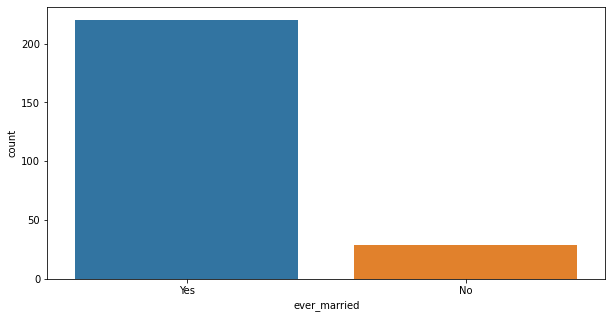

In [27]:
plt.figure(figsize=(10,5))
sns.countplot(data=df.loc[df['stroke']==1],x='ever_married')

<b> Note: People who are married have more chances of having stroke than others

# work_type

In [28]:
df['work_type'].value_counts()

Private          2925
Self-employed     819
children          687
Govt_job          657
Never_worked       22
Name: work_type, dtype: int64

In [29]:
print('Percentage of Stroke')
df[df['stroke']==1].work_type.value_counts(sort=True)/df['work_type'].value_counts(sort=True)*100

Percentage of Stroke


Govt_job         5.022831
Never_worked          NaN
Private          5.094017
Self-employed    7.936508
children         0.291121
Name: work_type, dtype: float64

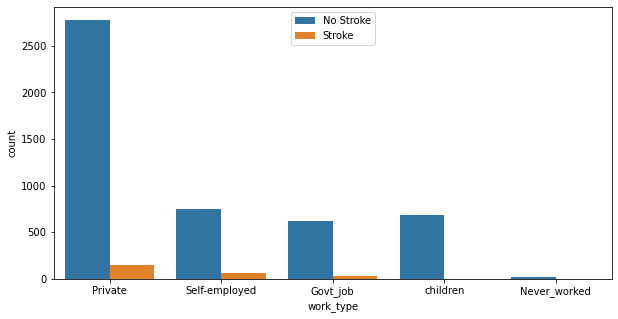

In [30]:
plt.figure(figsize=(10,5))
sns.countplot(data=df,x='work_type',hue='stroke')
plt.legend(['No Stroke','Stroke'])

<AxesSubplot:xlabel='work_type', ylabel='count'>

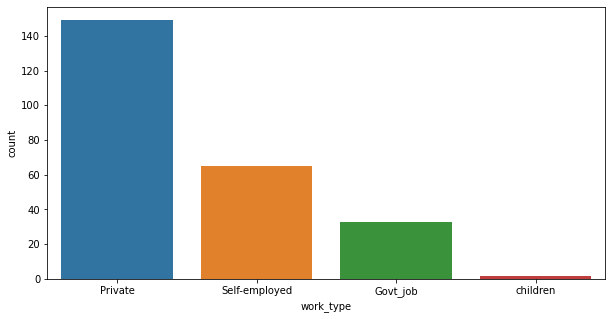

In [31]:
plt.figure(figsize=(10,5))
sns.countplot(data=df.loc[df['stroke']==1],x='work_type')

<b> Note: Chances of having stroke: private > Self-employed > govt_job > children

# Residence_type

In [32]:
df['Residence_type'].value_counts()

Urban    2596
Rural    2514
Name: Residence_type, dtype: int64

In [33]:
print('Percentage of Stroke')
df[df['stroke']==1].Residence_type.value_counts(sort=True)/df['Residence_type'].value_counts(sort=True)*100

Percentage of Stroke


Urban    5.200308
Rural    4.534606
Name: Residence_type, dtype: float64

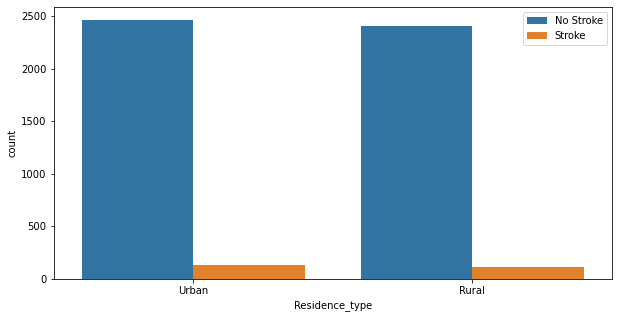

In [34]:
plt.figure(figsize=(10,5))
sns.countplot(data=df,x='Residence_type',hue='stroke')
plt.legend(['No Stroke','Stroke'])

<AxesSubplot:xlabel='Residence_type', ylabel='count'>

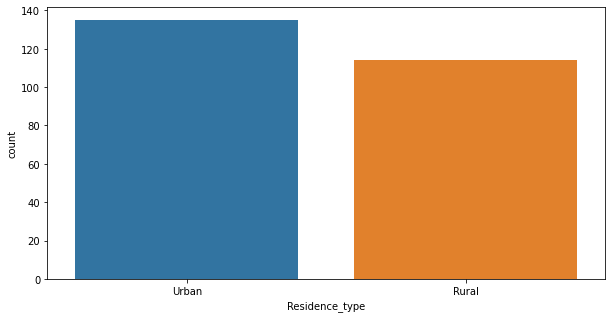

In [35]:
plt.figure(figsize=(10,5))
sns.countplot(data=df.loc[df['stroke']==1],x='Residence_type')

<b>Note: As residence_type have nearby values stroke appears to be nearly equal in this case

# avg_glucose_level

Mean :  106.14767710371804


C:\Users\Rajan\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='avg_glucose_level', ylabel='Density'>

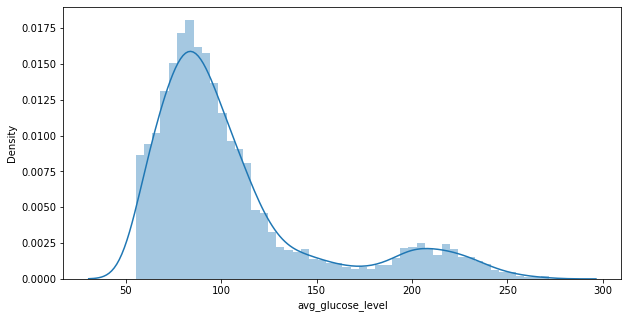

In [36]:
print('Mean : ',df['avg_glucose_level'].mean())
plt.figure(figsize=(10, 5))
sns.distplot(df['avg_glucose_level'],bins=50, kde=True)

Mean :  132.54473895582322


C:\Users\Rajan\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='avg_glucose_level', ylabel='Density'>

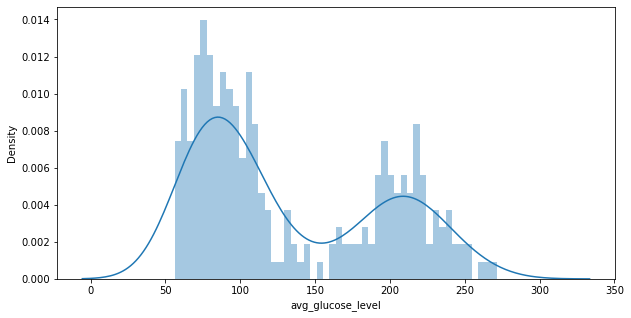

In [37]:
print('Mean : ',df[df['stroke']==1].avg_glucose_level.mean())
plt.figure(figsize=(10, 5))
sns.distplot(df[df['stroke']==1].avg_glucose_level,bins=50, kde=True)

# bmi

Mean :  28.893236911794673


C:\Users\Rajan\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='bmi', ylabel='Density'>

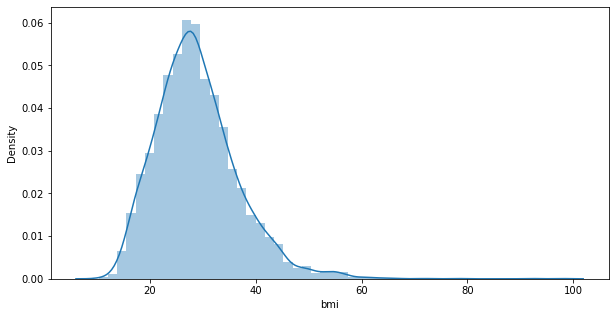

In [38]:
print('Mean : ',df['bmi'].mean())
plt.figure(figsize=(10, 5))
sns.distplot(df['bmi'],bins=50, kde=True)

Mean :  30.47129186602871


C:\Users\Rajan\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='bmi', ylabel='Density'>

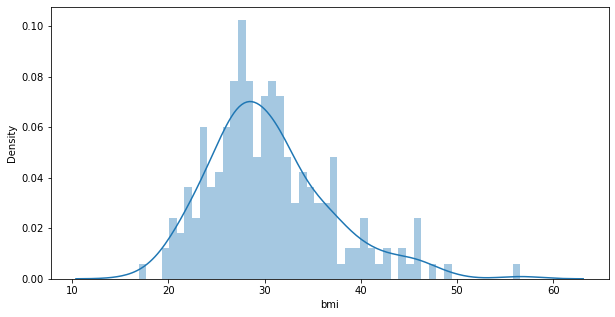

In [39]:
print('Mean : ',df[df['stroke']==1].bmi.mean())
plt.figure(figsize=(10, 5))
sns.distplot(df[df['stroke']==1].bmi,bins=50, kde=True)

# smoking_status

In [40]:
df['smoking_status'].value_counts()

never smoked       1892
Unknown            1544
formerly smoked     885
smokes              789
Name: smoking_status, dtype: int64

In [41]:
print('Percentage of Stroke')
df[df['stroke']==1].smoking_status.value_counts(sort=True)/df['smoking_status'].value_counts(sort=True)*100

Percentage of Stroke


Unknown            3.044041
formerly smoked    7.909605
never smoked       4.756871
smokes             5.323194
Name: smoking_status, dtype: float64

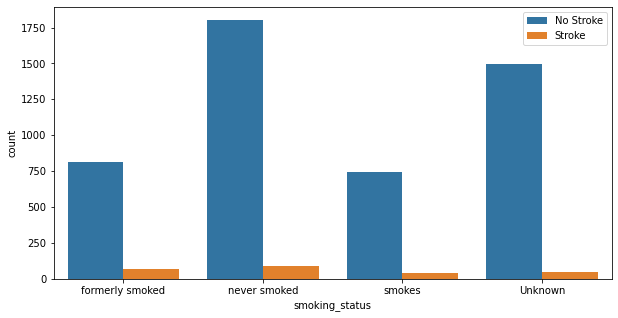

In [42]:
plt.figure(figsize=(10,5))
sns.countplot(data=df,x='smoking_status',hue='stroke')
plt.legend(['No Stroke','Stroke'])

<b>Note: People who have smoked have high chances to get stroke

<AxesSubplot:xlabel='smoking_status', ylabel='count'>

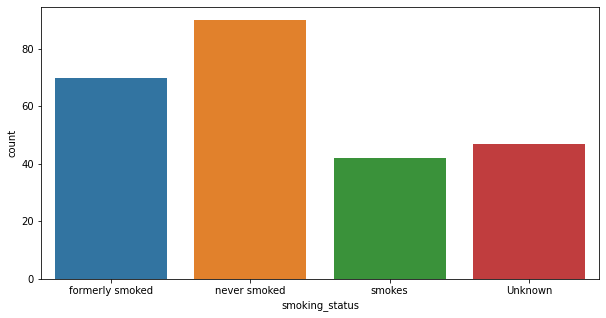

In [43]:
plt.figure(figsize=(10,5))
sns.countplot(data=df.loc[df['stroke']==1],x='smoking_status')

<AxesSubplot:>

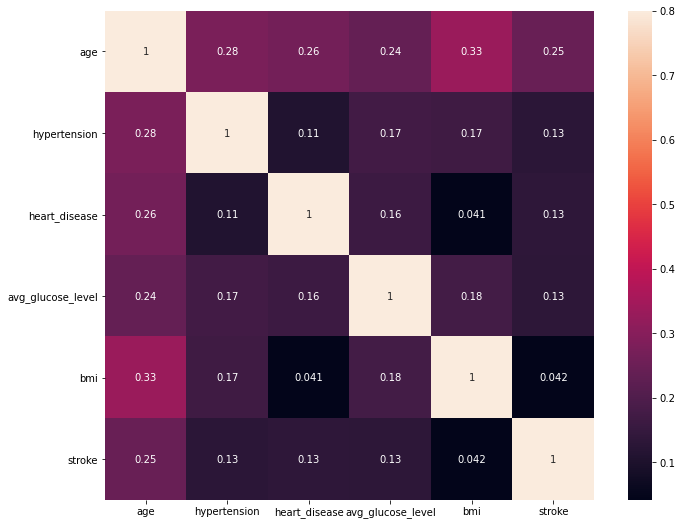

In [44]:
#correlation matrix
corrmat = df.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8,annot=True,square=True,)

# Note:We can see bmi is not corelated with stroke

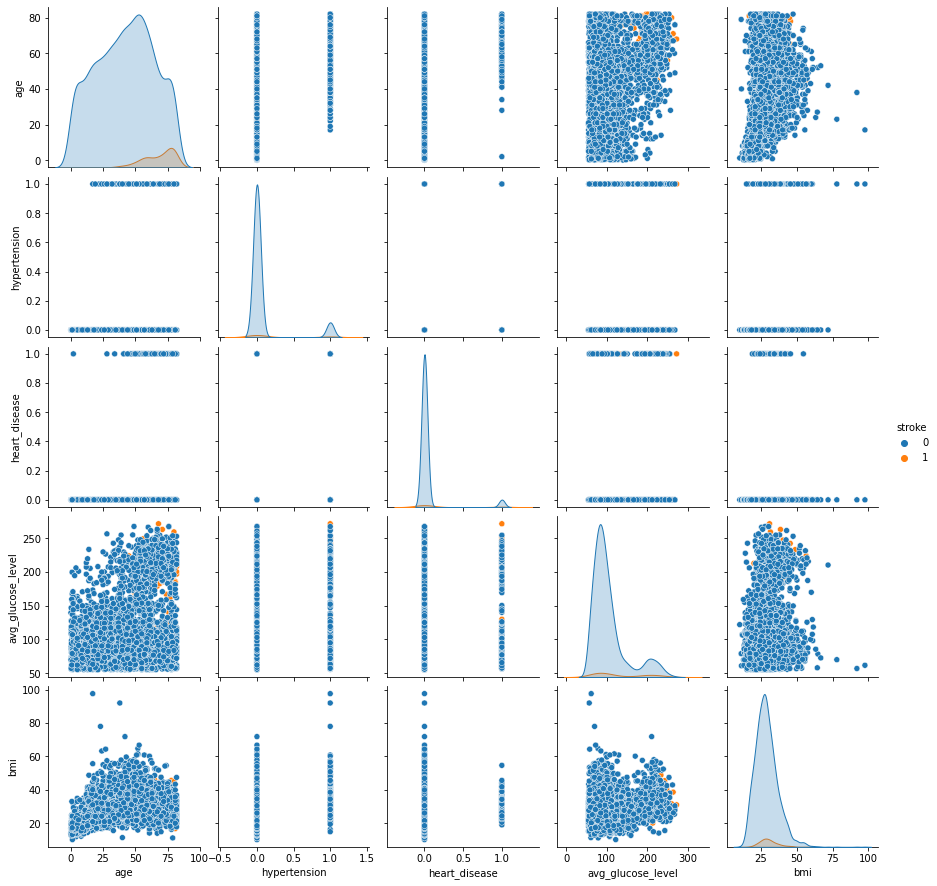

In [45]:
sns.pairplot(df, hue="stroke")

In [46]:
df.age.describe()

count    5110.000000
mean       43.226614
std        22.612647
min         0.080000
25%        25.000000
50%        45.000000
75%        61.000000
max        82.000000
Name: age, dtype: float64

In [47]:
def group_age(data):
    temp_list=[]
    for i in data:
        if i<=5:
            temp_list.append(5)
        elif i<=10:
            temp_list.append(10)
        elif i<=15:
            temp_list.append(15)
        elif i<=20:
            temp_list.append(20)
        elif i<=25:
            temp_list.append(25)
        elif i<=30:
            temp_list.append(30)
        elif i<=35:
            temp_list.append(35)
        elif i<=40:
            temp_list.append(40)
        elif i<=45:
            temp_list.append(45)
        elif i<=50:
            temp_list.append(50)
        elif i<=55:
            temp_list.append(55)
        elif i<=60:
            temp_list.append(60)
        elif i<=65:
            temp_list.append(65)
        elif i<=70:
            temp_list.append(70)
        elif i<=75:
            temp_list.append(75)
        elif i<=80:
            temp_list.append(80)
        else:
            temp_list.append(85)
    return temp_list
            

In [48]:
df['temp_age']=group_age(df.age.values)

In [49]:
df.avg_glucose_level.describe()

count    5110.000000
mean      106.147677
std        45.283560
min        55.120000
25%        77.245000
50%        91.885000
75%       114.090000
max       271.740000
Name: avg_glucose_level, dtype: float64

In [50]:
def rec_range(data,rg):
    temp_list=[]
    for i in data:
        ctr=0
        for j in rg:
            if i<=j and ctr==0:
                temp_list.append(j)
                ctr=ctr+1
            else:
                continue
    return temp_list
rg=[i for i in range(55,276,5)]                

In [51]:
df['temp_glucose']=rec_range(df.avg_glucose_level.values,rg)

In [52]:
df.bmi.describe()

count    4909.000000
mean       28.893237
std         7.854067
min        10.300000
25%        23.500000
50%        28.100000
75%        33.100000
max        97.600000
Name: bmi, dtype: float64

In [53]:
rg_bmi=[i for i in range(15,101,5)]
rg_bmi

[15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80, 85, 90, 95, 100]

In [54]:
def bmi_range(data,rg):
    temp_list=[]
    for i in data:
        ctr=0
        for j in rg:
            if i<=j and ctr==0:
                temp_list.append(j)
                ctr=ctr+1
            elif pd.isna(i) and ctr==0:
                temp_list.append(30)
                ctr=ctr+1
            else:
                continue
    return temp_list

In [55]:
df['temp_bmi']=bmi_range(df.bmi.values,rg_bmi)

In [56]:
df[df['stroke']==1].temp_bmi.value_counts()

30    115
35     54
25     35
40     24
45     11
50      6
20      3
60      1
Name: temp_bmi, dtype: int64

<AxesSubplot:xlabel='bmi'>

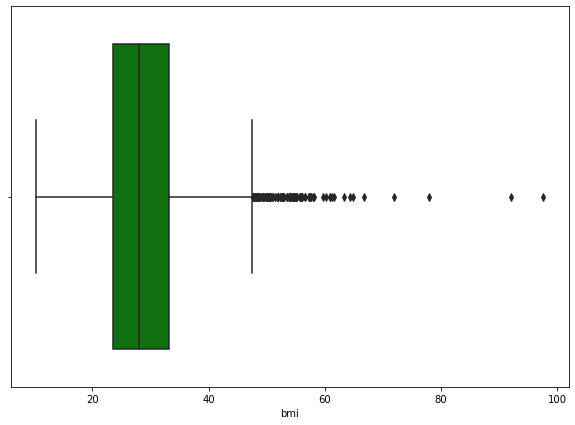

In [57]:
plt.figure(figsize=(10,7))
sns.boxplot(data=df,x=df["bmi"],color='green')

In [58]:
df['bmi'].describe()

count    4909.000000
mean       28.893237
std         7.854067
min        10.300000
25%        23.500000
50%        28.100000
75%        33.100000
max        97.600000
Name: bmi, dtype: float64

In [59]:
temp_val=df['bmi'].quantile(q=.75)+1.5*(df['bmi'].quantile(q=.75)-df['bmi'].quantile(q=.25))
temp_val

47.5

In [60]:
df["bmi"]=df["bmi"].apply(lambda x: temp_val if x>temp_val else x)

In [61]:
df["bmi"] = df["bmi"].fillna(df['bmi'].quantile(q=0.5))

<AxesSubplot:xlabel='bmi'>

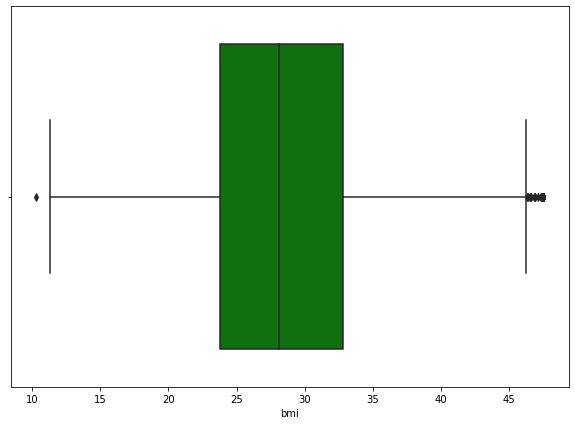

In [62]:
plt.figure(figsize=(10,7))
sns.boxplot(data=df,x=df["bmi"],color='green')

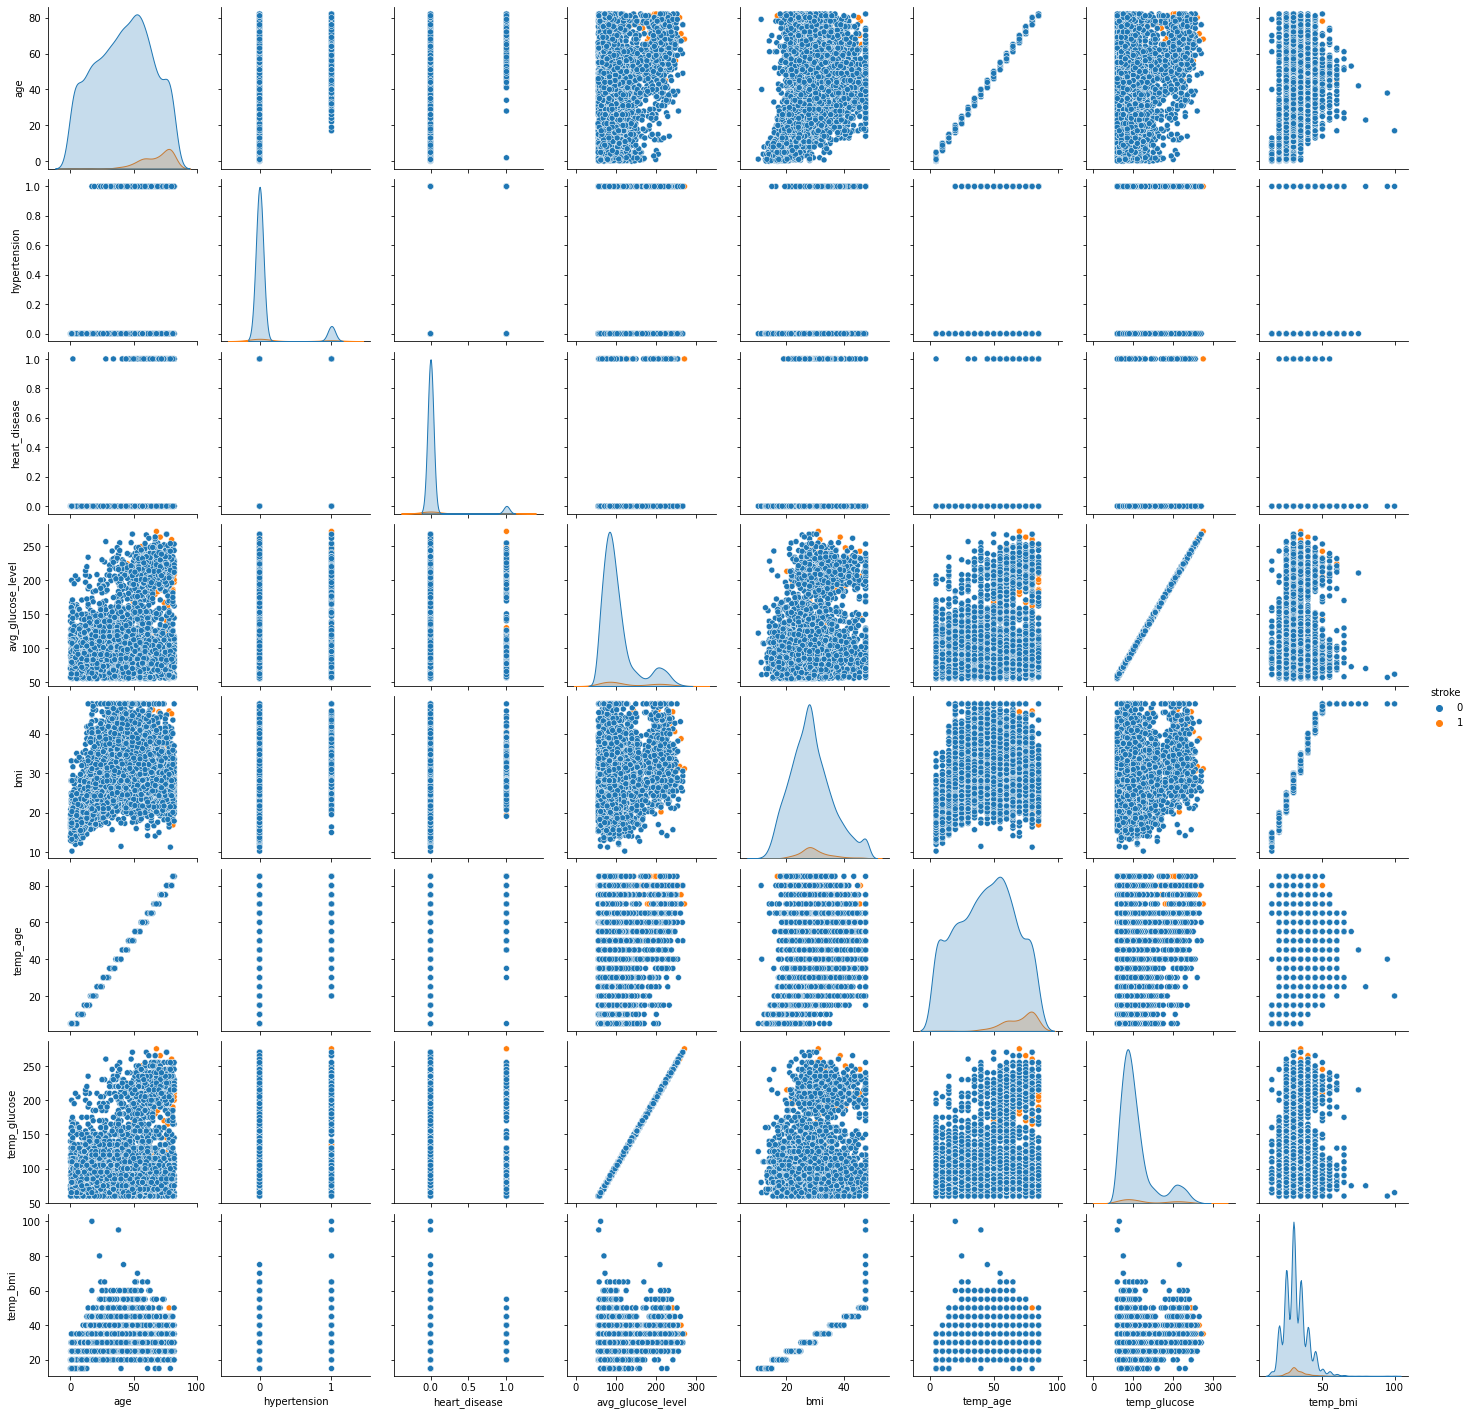

In [63]:
sns.pairplot(df, hue="stroke")

# Observations:
<b>gender :</b>
Females get 130.5% more strokes compared to male<br/>

<b>hypertension :</b>
People not having hypertension has 277.27% more chances to get stoke<br/>

<b>heart_disease :</b>
People not having heart disease has 429.78% chances to get strokes than people who have heart disease<br/>

<b>ever_married :</b>
married people have 758.62% of chances to have stroke compared to unmarried people<br/>

<b>work type :</b>
people serving in private sector and sel employed has more chnces to get stroke than govt_job<br/>

<b>residence type :</b>
Both have nearly same equal chance to get stroke<br/>

<b>bmi :</b>
people who has bmi between 26-35 had more strokes<br/>

<b>age :</b>
as age increases chances of getting stroke increases, above 65 chances are higly increased<br/>

# Preprocesing:

In [64]:
df.head(2)

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,temp_age,temp_glucose,temp_bmi
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1,70,230,40
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.1,never smoked,1,65,205,30


In [65]:
df["gender"] = df["gender"].apply(lambda x: 1 if x=="Male" else 0)
df["ever_married"] = df["ever_married"].apply(lambda x: 1 if x=="Yes" else 0)
df["Residence_type"] = df["Residence_type"].apply(lambda x: 1 if x=="Urban" else 0)
df = pd.get_dummies(data=df, columns=['smoking_status'])
df = pd.get_dummies(data=df, columns=['work_type'])

# Scaling Features

In [66]:
from sklearn.preprocessing import StandardScaler

In [67]:
std=StandardScaler()
columns = ['avg_glucose_level','bmi','age','temp_glucose','temp_bmi','temp_age']
scaled = std.fit_transform(df[['avg_glucose_level','bmi','age','temp_glucose','temp_bmi','temp_age']])
scaled = pd.DataFrame(scaled,columns=columns)
df=df.drop(columns=columns,axis=1)

In [68]:
df=df.merge(scaled, left_index=True, right_index=True, how = "left")
df

,gender,hypertension,heart_disease,ever_married,Residence_type,stroke,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes,...,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,avg_glucose_level,bmi,age,temp_glucose,temp_bmi,temp_age
0,1,0,1,1,1,1,0,1,0,0,...,0,1,0,0,2.706375,1.096097,1.051434,2.680850,1.115955,1.094432
1,0,0,0,1,0,1,0,0,1,0,...,0,0,1,0,2.121559,-0.085971,0.786070,2.128536,-0.165512,0.873182
2,1,0,1,1,0,1,0,0,1,0,...,0,1,0,0,-0.005028,0.525923,1.626390,0.029745,0.475221,1.536933
3,0,0,0,1,1,1,0,0,0,1,...,0,1,0,0,1.437358,0.790150,0.255342,1.465760,0.475221,0.209430
4,0,1,0,1,0,1,0,0,1,0,...,0,0,1,0,1.501184,-0.656145,1.582163,1.465760,-0.806246,1.536933
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5105,0,1,0,1,1,0,0,0,1,0,...,0,1,0,0,-0.494658,-0.085971,1.626390,-0.522569,-0.165512,1.536933
5106,0,0,0,1,1,0,0,0,1,0,...,0,0,1,0,0.420775,1.568924,1.670617,0.471596,1.115955,1.758184
5107,0,0,0,1,0,0,0,0,1,0,...,0,0,1,0,-0.511443,0.261696,-0.363842,-0.522569,0.475221,-0.454321
5108,1,0,0,1,0,0,0,1,0,0,...,0,1,0,0,1.328257,-0.433638,0.343796,1.355297,-0.165512,0.430681


In [69]:
cols = df.columns
cols = list(cols)
cols

['gender',
 'hypertension',
 'heart_disease',
 'ever_married',
 'Residence_type',
 'stroke',
 'smoking_status_Unknown',
 'smoking_status_formerly smoked',
 'smoking_status_never smoked',
 'smoking_status_smokes',
 'work_type_Govt_job',
 'work_type_Never_worked',
 'work_type_Private',
 'work_type_Self-employed',
 'work_type_children',
 'avg_glucose_level',
 'bmi',
 'age',
 'temp_glucose',
 'temp_bmi',
 'temp_age']

In [70]:
y = df['stroke']
X = df[set(cols)-set(['id', 'stroke'])]
X.head()

,avg_glucose_level,temp_bmi,smoking_status_smokes,smoking_status_never smoked,work_type_Govt_job,bmi,age,heart_disease,hypertension,work_type_Never_worked,work_type_children,temp_glucose,ever_married,temp_age,work_type_Private,smoking_status_Unknown,gender,smoking_status_formerly smoked,work_type_Self-employed,Residence_type
0,2.706375,1.115955,0,0,0,1.096097,1.051434,1,0,0,0,2.680850,1,1.094432,1,0,1,1,0,1
1,2.121559,-0.165512,0,1,0,-0.085971,0.786070,0,0,0,0,2.128536,1,0.873182,0,0,0,0,1,0
2,-0.005028,0.475221,0,1,0,0.525923,1.626390,1,0,0,0,0.029745,1,1.536933,1,0,1,0,0,0
3,1.437358,0.475221,1,0,0,0.790150,0.255342,0,0,0,0,1.465760,1,0.209430,1,0,0,0,0,1
4,1.501184,-0.806246,0,1,0,-0.656145,1.582163,0,1,0,0,1.465760,1,1.536933,0,0,0,0,1,0


<h4> Splitting of data</h4>

In [71]:
from sklearn.model_selection import train_test_split

In [72]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

In [73]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score

# XGboost

Training Score(Accuracy): 0.9598121085594989
Testing Score (Accuracy): 0.9483568075117371
F1 score: 0.948356807511737


<AxesSubplot:>

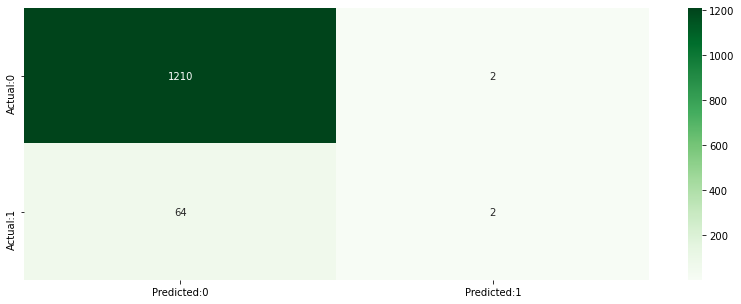

In [74]:
xgboost = GradientBoostingClassifier(random_state=0)
xgboost.fit(X_train, y_train)
print('Training Score(Accuracy):',xgboost.score(X_train, y_train))
print('Testing Score (Accuracy):',xgboost.score(X_test, y_test))

y_pred = xgboost.predict(X_test)
print('F1 score:',f1_score(y_test, y_pred,average='micro'))
cm = confusion_matrix(y_test,y_pred)
#Confusion Matrix 
plt.figure(figsize=(14,5))

conf_matrix = pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
sns.heatmap(conf_matrix, annot=True,fmt='d',cmap="Greens")


# SVM

In [75]:
from sklearn.svm import SVC

Training Score (Accuracy):  0.9522442588726514
Testing Score (Accuracy):  0.9483568075117371
F1 score: 0.948356807511737


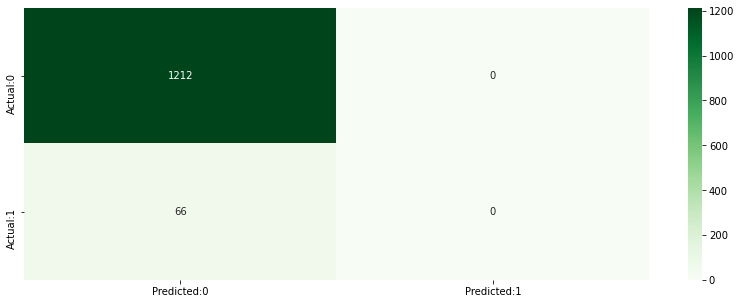

In [76]:
svc = SVC(random_state=0)
svc.fit(X_train, y_train)
print('Training Score (Accuracy): ',svc.score(X_train, y_train))
print('Testing Score (Accuracy): ',svc.score(X_test, y_test))
y_pred = svc.predict(X_test)
print('F1 score:',f1_score(y_test, y_pred,average='micro'))
cm = confusion_matrix(y_test,y_pred)
plt.figure(figsize=(14,5))

conf_matrix = pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
sns.heatmap(conf_matrix, annot=True,fmt='d',cmap="Greens");

# Random Forest Classifier

In [77]:
from sklearn.ensemble import RandomForestClassifier

Training Score (Accuracy):  1.0
Testing Score (Accuracy):  0.9475743348982786
F1 score: 0.9475743348982786


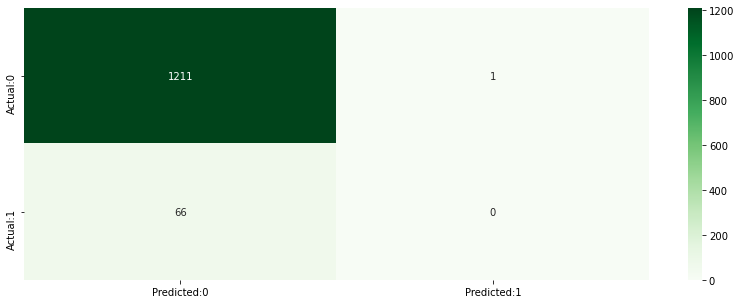

In [78]:
forest = RandomForestClassifier(n_estimators = 100)
forest.fit(X_train, y_train)
print('Training Score (Accuracy): ',forest.score(X_train, y_train))
print('Testing Score (Accuracy): ',forest.score(X_test, y_test))
y_pred = forest.predict(X_test)
print('F1 score:',f1_score(y_test, y_pred,average='micro'))
cm = confusion_matrix(y_test,y_pred)
plt.figure(figsize=(14,5))
conf_matrix = pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
sns.heatmap(conf_matrix, annot=True,fmt='d',cmap="Greens");

# Logistic Regression

In [79]:
from sklearn.linear_model import LogisticRegression

Training Score (Accuracy):  0.9527661795407099
Testing Score (Accuracy):  0.9483568075117371
F1 score: 0.948356807511737


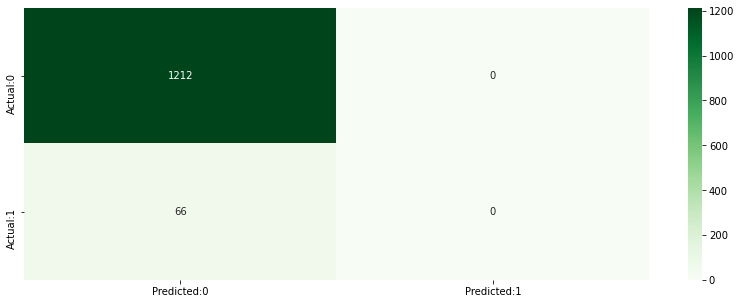

In [80]:
model = LogisticRegression()
model.fit(X_train, y_train)
print('Training Score (Accuracy): ',model.score(X_train, y_train))
print('Testing Score (Accuracy): ',model.score(X_test, y_test))
y_pred= model.predict(X_test)
print('F1 score:',f1_score(y_test, y_pred,average='micro'))
cm = confusion_matrix(y_test,y_pred)
plt.figure(figsize=(14,5))
conf_matrix = pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
sns.heatmap(conf_matrix, annot=True,fmt='d',cmap="Greens");